<h2>1. Introdução</h2>

<h4>1.1 Objetivo Geral</h4>

<h4>1.1.1 Objetivo Especifico</h4>

<h4>1.1.2 Perguntas a Serem Respondidas</h4>

<h2>2. Desenvolvimento</h2>

<h4>2.1 Importando Bibliotecas</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import funcoes as func
import numpy as np
from PIL import Image

# Remoção apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

Dados Usados:

Importando os datasets separados

In [2]:
agents_vct2021 = pd.read_csv('datasets-criados/agents_pick_vct2021.csv')
agents_vct2022 = pd.read_csv('datasets-criados/agents_pick_vct2022.csv')
agents_vct2023 = pd.read_csv('datasets-criados/agents_pick_vct2023.csv')


maps_vct2021 = pd.read_csv('datasets-criados/maps_vct2021.csv')
maps_vct2022 = pd.read_csv('datasets-criados/maps_vct2022.csv')
maps_vct2023 = pd.read_csv('datasets-criados/maps_vct2023.csv')


Pré Processamento dos dados

Limpeza de dados

In [3]:
agents_vct = pd.concat([agents_vct2021, agents_vct2022, agents_vct2023], axis=0)
agents_vct.rename(columns={'Pick Rate': 'Pick Rate (%)'}, inplace = True)

maps_vct = pd.concat([maps_vct2021,maps_vct2022,maps_vct2023], axis= 0)


In [4]:
roles = {'astra':'Controlador', 'brimstone':'Controlador', 'viper':'Controlador', 'omen':'Controlador', 'harbor':'Controlador',
         'killjoy':'Sentinela', 'cypher':'Sentinela', 'chamber':'Sentinela', 'sage':'Sentinela', 'deadlock':'Sentinela',
         'phoenix':'Duelista', 'jett':'Duelista', 'reyna':'Duelista', 'raze':'Duelista', 'iso':'Duelista', 'neon':'Duelista','yoru':'Duelista',
         'sova':'Iniciador', 'skye':'Iniciador', 'kay/o':'Iniciador', 'breach':'Iniciador', 'fade':'Iniciador', 'gekko':'Iniciador'}

agents_vct['Roles'] = agents_vct['Agent'].map(roles)

agents_vct


,Agent,Pick Rate (%),Roles
0,astra,65.00,Controlador
1,breach,13.40,Iniciador
2,brimstone,1.60,Controlador
3,chamber,0.00,Sentinela
4,cypher,34.60,Sentinela
...,...,...,...
18,sage,2.50,Sentinela
19,skye,50.50,Iniciador
20,sova,31.50,Iniciador
21,viper,40.50,Controlador


<h4>Quais agentes estão sendo escolhidos com mais frequência ao longo do tempo?</h4>

In [5]:
agents = agents_vct['Agent'].unique()
for i in agents:
    print('\n',i,'\n')
    print(func.descricao_tabela(agents_vct,'Agent',i))


 astra 

       Pick Rate (%)
count       3.000000
mean       38.166667
std        23.718839
min        20.000000
25%        24.750000
50%        29.500000
75%        47.250000
max        65.000000

 breach 

       Pick Rate (%)
count        3.00000
mean        24.60000
std          9.86509
min         13.40000
25%         20.90000
50%         28.40000
75%         30.20000
max         32.00000

 brimstone 

       Pick Rate (%)
count        3.00000
mean        13.45000
std         10.39026
min          1.60000
25%          9.67500
50%         17.75000
75%         19.37500
max         21.00000

 chamber 

       Pick Rate (%)
count       3.000000
mean       28.450000
std        40.326883
min         0.000000
25%         5.375000
50%        10.750000
75%        42.675000
max        74.600000

 cypher 

       Pick Rate (%)
count       3.000000
mean       18.166667
std        15.275580
min         4.400000
25%         9.950000
50%        15.500000
75%        25.050000
max        34.6000

<h4>Gráfico da Porcentagem de Escolha dos Agentes</h4>

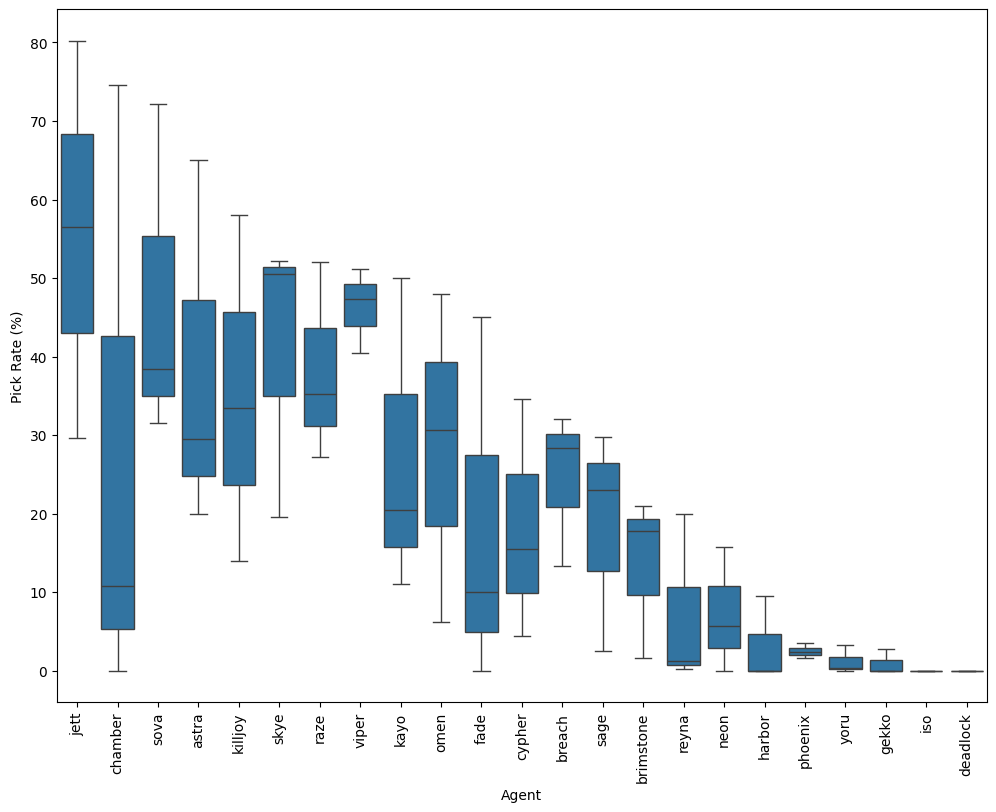

In [6]:
#Plotando o gráfico de colunas
plt.figure(figsize=(12, 9))
sns.boxplot(x='Agent', y='Pick Rate (%)', data=agents_vct, order=agents_vct.sort_values('Pick Rate (%)', ascending=False)['Agent'])
plt.xticks(rotation=90)
plt.show()

<h4>Qual é a distribuição percentual de vitórias na defesa e no ataque nos mapas jogados?</h4>

In [7]:
maps = maps_vct['Map'].unique()
for i in maps:
    print('\n',i,'\n')
    print(func.descricao_tabela(maps_vct,'Map',i))



 Ascent 

       Attacker Side Win Percentage  Defender Side Win Percentage
count                      3.000000                      3.000000
mean                      47.600000                     52.400000
std                        3.078961                      3.078961
min                       45.000000                     49.000000
25%                       45.900000                     51.100000
50%                       46.800000                     53.200000
75%                       48.900000                     54.100000
max                       51.000000                     55.000000

 Bind 

       Attacker Side Win Percentage  Defender Side Win Percentage
count                      3.000000                      3.000000
mean                      49.466667                     50.533333
std                        2.928026                      2.928026
min                       46.800000                     47.400000
25%                       47.900000                     

<h4>Gráfico da Porcentagem de Vitórias no Lado Atacante</h4>

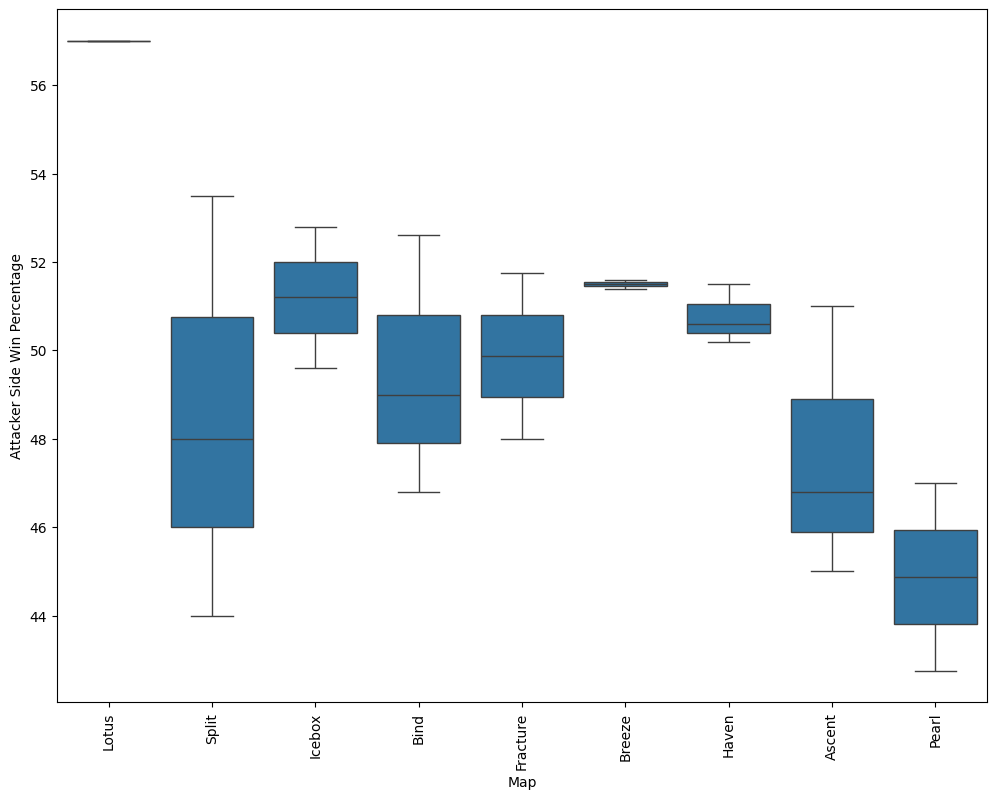

In [8]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Attacker Side Win Percentage', data = maps_vct, order = maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'])
plt.xticks(rotation=90)
plt.show()

<h4>Gráfico da Porcentagem de Vitórias no Lado Defensor</h4>

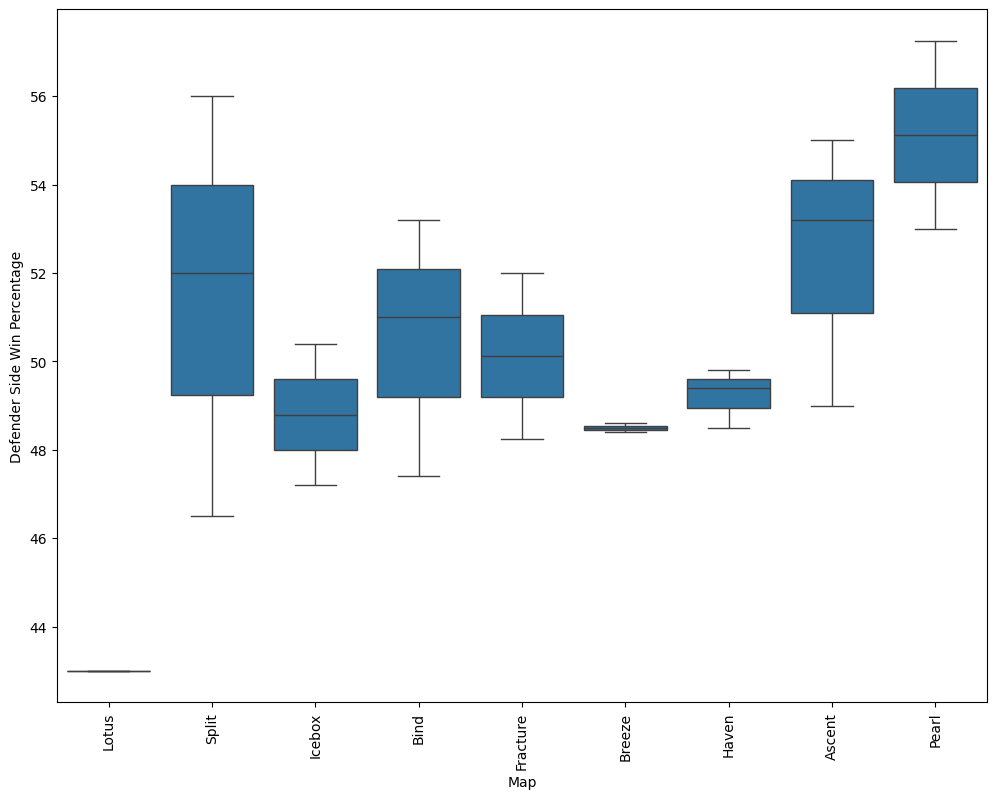

In [9]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Map', y='Defender Side Win Percentage', data=maps_vct, order=maps_vct.sort_values('Attacker Side Win Percentage', ascending=False)['Map'])
plt.xticks(rotation=90)
plt.show()

In [10]:
maps_vct_2_years= pd.merge(maps_vct2021, maps_vct2022, on='Map', how='outer')

maps_vct_total = pd.merge (maps_vct_2_years, maps_vct2023, on='Map', how='outer')

maps_vct_total = maps_vct_total.fillna(0, inplace=False)

maps_vct_total

,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,0.00,0.00
3,Fracture,0.0,0.0,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,0.00,0.00
6,Lotus,0.0,0.0,0.0,0.0,57.00,43.00
7,Pearl,0.0,0.0,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


In [11]:
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Attacker Side Win Percentage_x'] = 57.00
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Defender Side Win Percentage_x'] = 43.00

maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Attacker Side Win Percentage_y'] = 57.00
maps_vct_total.loc[maps_vct_total['Map'] == 'Lotus', 'Defender Side Win Percentage_y'] = 43.00

maps_vct_total.loc[maps_vct_total['Map'] == 'Fracture', 'Attacker Side Win Percentage_x'] = round(((48.00 + 51.75 ) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Fracture', 'Defender Side Win Percentage_x'] = round(((52.00 + 48.25 ) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Pearl', 'Attacker Side Win Percentage_x'] = round(((47.00 + 42.75) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Pearl', 'Defender Side Win Percentage_x'] = round(((53.00 + 57.25) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Breeze', 'Attacker Side Win Percentage'] = round(((51.6 + 51.4) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Breeze', 'Defender Side Win Percentage'] = round(((48.4  + 48.6) / 2) ,1)

maps_vct_total.loc[maps_vct_total['Map'] == 'Icebox', 'Attacker Side Win Percentage'] = round(((52.8 + 49.6) / 2) ,1)
maps_vct_total.loc[maps_vct_total['Map'] == 'Icebox', 'Defender Side Win Percentage'] = round(((47.2  + 50.4) / 2) ,1)


maps_vct_total


,Map,Attacker Side Win Percentage_x,Defender Side Win Percentage_x,Attacker Side Win Percentage_y,Defender Side Win Percentage_y,Attacker Side Win Percentage,Defender Side Win Percentage
0,Ascent,46.8,53.2,45.0,55.0,51.00,49.00
1,Bind,46.8,53.2,52.6,47.4,49.00,51.00
2,Breeze,51.6,48.4,51.4,48.6,51.50,48.50
3,Fracture,49.9,50.1,48.0,52.0,51.75,48.25
4,Haven,50.6,49.4,50.2,49.8,51.50,48.50
5,Icebox,52.8,47.2,49.6,50.4,51.20,48.80
6,Lotus,57.0,43.0,57.0,43.0,57.00,43.00
7,Pearl,44.9,55.1,47.0,53.0,42.75,57.25
8,Split,44.0,56.0,48.0,52.0,53.50,46.50


In [12]:
maps_vct_total['Total Attacker Side Win Percentage'] = maps_vct_total[['Attacker Side Win Percentage_x', 'Attacker Side Win Percentage_y', 'Attacker Side Win Percentage']].mean(axis=1).round(2)

maps_vct_total['Total Defender Side Win Percentage'] = maps_vct_total[['Defender Side Win Percentage_x', 'Defender Side Win Percentage_y', 'Defender Side Win Percentage']].mean(axis=1).round(2)


maps_vct_final =  pd.concat([maps_vct_total['Map'], maps_vct_total['Total Attacker Side Win Percentage'], maps_vct_total ['Total Defender Side Win Percentage']], axis=1)

maps_vct_final = maps_vct_final.fillna(0, inplace=False)

maps_vct_final

,Map,Total Attacker Side Win Percentage,Total Defender Side Win Percentage
0,Ascent,47.60,52.40
1,Bind,49.47,50.53
2,Breeze,51.50,48.50
3,Fracture,49.88,50.12
4,Haven,50.77,49.23
5,Icebox,51.20,48.80
6,Lotus,57.00,43.00
7,Pearl,44.88,55.12
8,Split,48.50,51.50


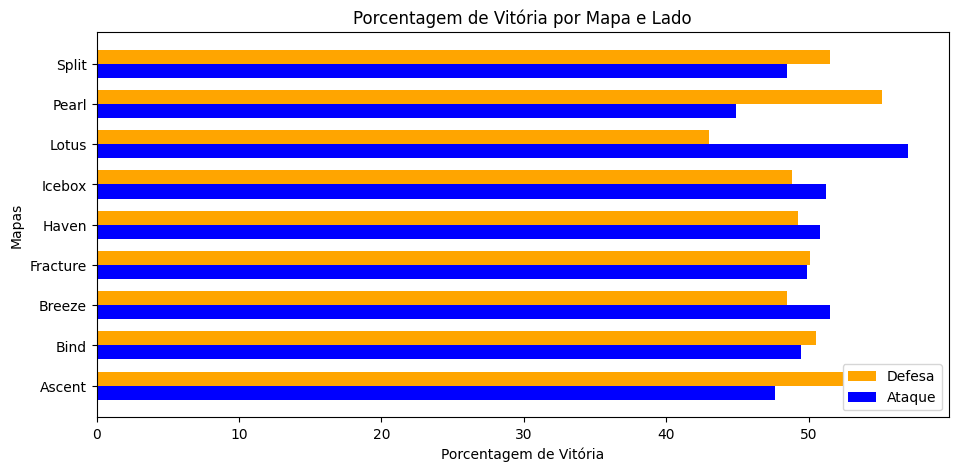

In [13]:
import funcoes as func
func.mostraGraficoMap(maps_vct_final)

O gráfico de colunas acima representa a porcentagem de vitórias pelo lado atacante e pelo lado defensor nos mapas jogados competitivamente no Valorant Champions Tour (VCT) ao longo dos anos de 2021 a 2023. É possível observar que no mapa "Lotus", as vitórias são quase garantidas quando se está do lado do ataque, enquanto no mapa "Perl" a vantagem está claramente do lado da defesa, assim como no mapa "Ascent". Nos outros mapas, no entanto, as porcentagens não variam muito, com as vitórias ficando quase empatadas entre os lados atacante e defensor.

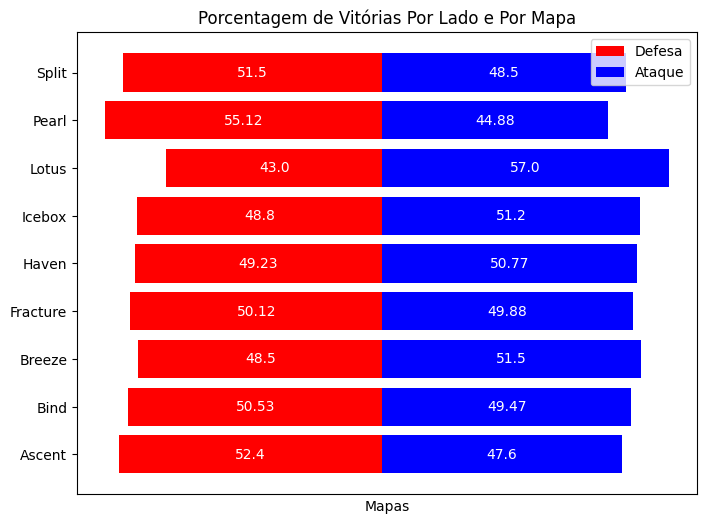

In [14]:
age_groups = maps_vct_final["Map"]
male_population = maps_vct_final["Total Attacker Side Win Percentage"]
female_population = maps_vct_final["Total Defender Side Win Percentage"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(age_groups, [-val for val in female_population], color='red', align='center', label='Defesa')
ax.barh(age_groups, male_population, color='blue', align='center', label='Ataque')

for i, (male_val, female_val) in enumerate(zip(male_population, female_population)):
    ax.text(male_val / 2, i, str(male_val), ha='center', va='center', color='white')
    ax.text(-female_val / 2, i, str(female_val), ha='center', va='center', color='white')

ax.set_xlabel('Mapas')
ax.set_title('Porcentagem de Vitórias Por Lado e Por Mapa')


ax.set_xticks([])

# Add legend
ax.legend()

plt.show()

In [15]:


df_joined = pd.merge(agents_vct2021, agents_vct2022, on='Agent', how='outer')

agente_joined = pd.merge(df_joined, agents_vct2023, on='Agent', how='outer')

agente_joined

,Agent,Pick Rate_x,Pick Rate_y,Pick Rate
0,astra,65.0,20.0,29.50
1,breach,13.4,28.4,32.00
2,brimstone,1.6,21.0,17.75
3,chamber,0.0,74.6,10.75
4,cypher,34.6,4.4,15.50
5,deadlock,0.0,0.0,0.00
6,fade,0.0,45.0,10.00
7,gekko,0.0,0.0,2.75
8,harbor,0.0,0.0,9.50
9,iso,0.0,0.0,0.00


In [16]:
agente_joined['Pick Rate (%)'] = agente_joined[['Pick Rate_x', 'Pick Rate_y', 'Pick Rate']].mean(axis=1).round(2)


nova_tabela_agent = pd.concat([agente_joined['Agent'], agente_joined['Pick Rate (%)']], axis=1)

nova_tabela_agent

,Agent,Pick Rate (%)
0,astra,38.17
1,breach,24.60
2,brimstone,13.45
3,chamber,28.45
4,cypher,18.17
5,deadlock,0.00
6,fade,18.33
7,gekko,0.92
8,harbor,3.17
9,iso,0.00


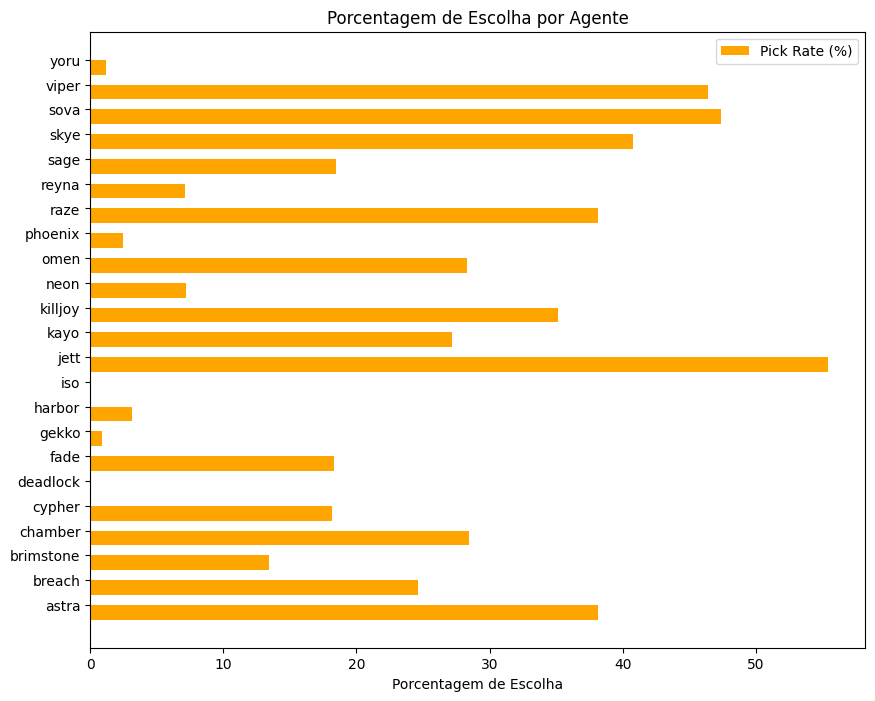

In [17]:
func.mostraGraficoAgent(nova_tabela_agent)

O gráfico de barras mostra a porcentagem geral de escolha dos agentes no Valorant Champions Tour (VCT) de 2021 a 2023. Ao analisar o gráfico, percebemos a alta taxa de escolha dos agentes "Jett", "Viper" e "Sova". Esses agentes são bastante importantes nas composições por mapas, já que a Jett desempenha o papel de duelista, a Viper é uma controladora e o Sova é um iniciador. Essa composição é completa e funciona em quase todos os mapas do jogo.

Alguns agentes, como Yoru, Reyna e Phoenix, possuem uma taxa de escolha baixa devido às suas habilidades que não são tão eficazes para trabalhar em equipe. Esses agentes são mais voltados para um estilo de jogo individual, por isso não são tão escolhidos no cenário competitivo.

Agentes como Iso, Harbor, Gekko e Deadlock não são tão escolhidos porque são agentes novos lançados entre 2022 e 2023, e ainda não foram utilizados competitivamente. Por isso, as porcentagens de escolha para esses agentes são baixas ou até mesmo nulas.

<img src="assets/img-agents/jett.jpg" alt="Minha Imagem">

In [18]:
agents_vct2021_bar = agents_vct2021
agents_vct2022_bar = agents_vct2022
agents_vct2023_bar = agents_vct2023

agents_vct2021_bar['Year'] = 2021
agents_vct2022_bar['Year'] = 2022
agents_vct2023_bar['Year'] = 2023

agents_vct2021_ord = agents_vct2021.sort_values(by='Pick Rate', ascending=False)
agents_vct2022_ord = agents_vct2022.sort_values(by='Pick Rate', ascending=False)
agents_vct2023_ord = agents_vct2023.sort_values(by='Pick Rate', ascending=False)

agents_vct2021_ord = agents_vct2021_ord.head(22)
agents_vct2022_ord = agents_vct2022_ord.head(22)
agents_vct2023_ord = agents_vct2023_ord.head(22)

agents_vct_ord = pd.concat([agents_vct2021_ord, agents_vct2022_ord, agents_vct2023_ord], axis=0)

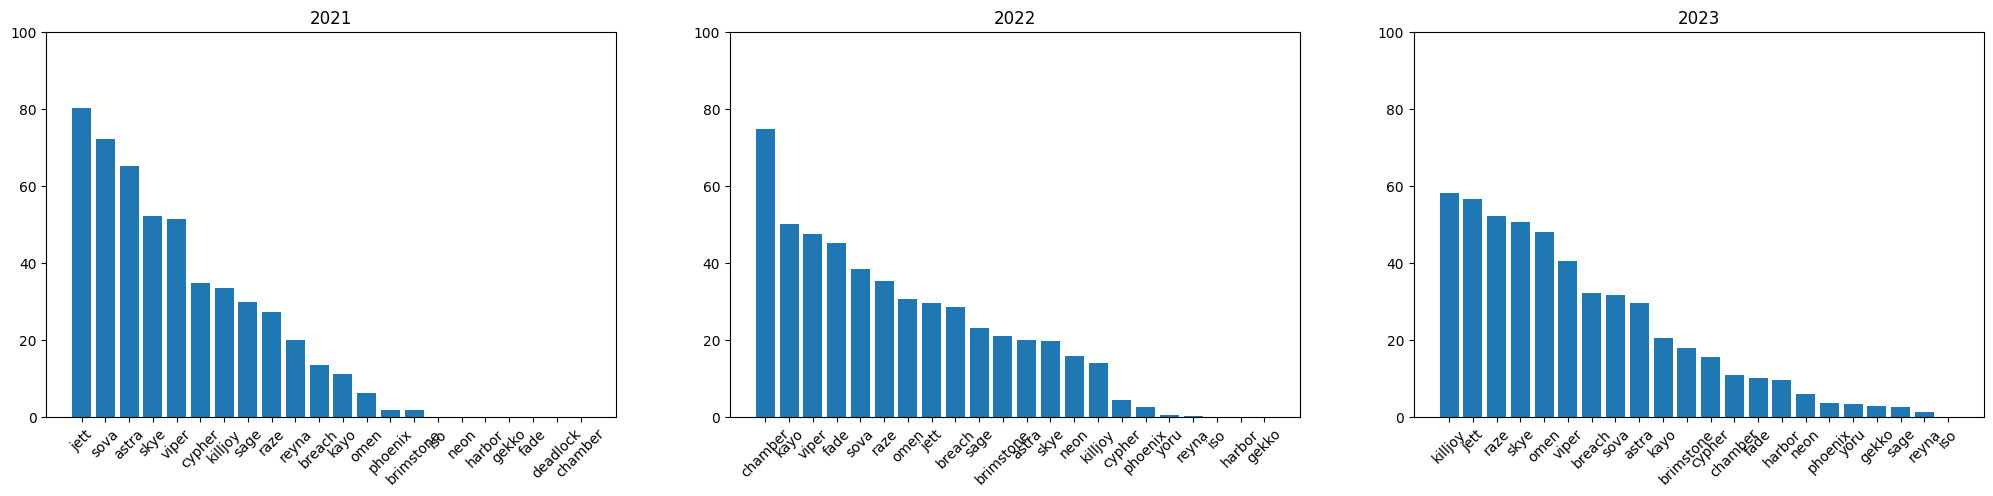

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].bar(agents_vct2021_ord["Agent"], agents_vct2021_ord["Pick Rate"])
axs[0].set_ylim(0, 100)
axs[0].set_title('2021')
axs[0].tick_params(axis='x', rotation=45) 

axs[1].bar(agents_vct2022_ord["Agent"], agents_vct2022_ord["Pick Rate"])
axs[1].set_ylim(0, 100)
axs[1].set_title('2022')
axs[1].tick_params(axis='x', rotation=45)  

axs[2].bar(agents_vct2023_ord["Agent"], agents_vct2023_ord["Pick Rate"])
axs[2].set_ylim(0, 100)
axs[2].set_title('2023')
axs[2].tick_params(axis='x', rotation=45) 

plt.show()


Visualizando os gráficos das escolhas dos agentes durante o Valorant Champions Tour (VCT) ao longo dos anos de 2021 a 2023, podemos perceber a variação do meta no jogo, ou seja, os agentes mais frequentemente escolhidos. Em 2021, o agente Chamber ainda não havia sido lançado, portanto sua porcentagem era nula. Já em 2022, ele subiu rapidamente do último para o primeiro lugar, devido às suas habilidades serem muito eficazes para a defesa, sendo sua especialidade como sentinela. No entanto, em 2023, ele sofreu uma queda drástica devido aos nerfs que suas habilidades receberam. Com isso, podemos concluir que o meta das escolhas dos agentes está em constante mudança, seja por buffs ou nerfs.

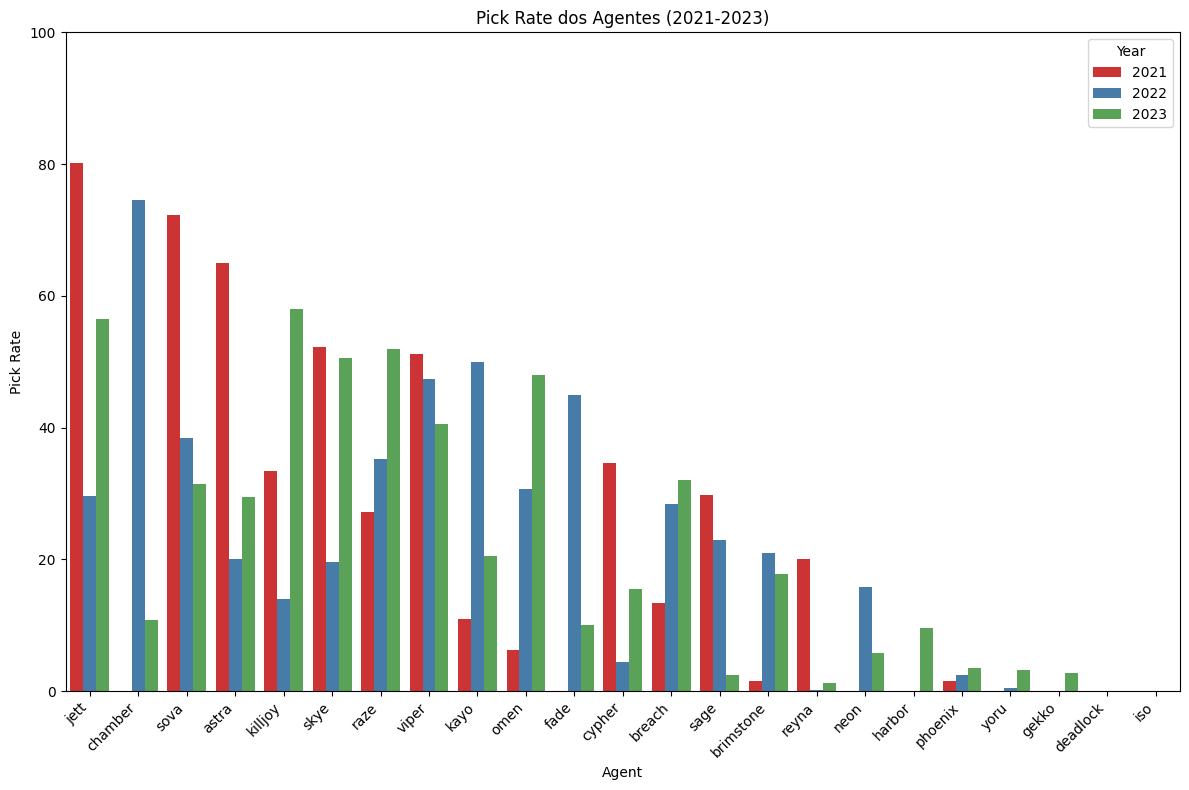

In [20]:
agents_vct_ord.sort_values(by="Pick Rate", ascending=False, inplace=True)

# Configurações para o gráfico de barras
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras com o DataFrame 'agents_vct_ord'
sns.barplot(data=agents_vct_ord, x="Agent", y="Pick Rate", hue="Year", palette='Set1')

plt.ylim(0, 100)  
plt.xticks(rotation=45, ha='right')  
plt.title('Pick Rate dos Agentes (2021-2023)')  
plt.tight_layout()  

# Exibe o gráfico
plt.show()

Neste gráfico, também estamos explorando a porcentagem de escolha dos agentes no VCT, de 2021 a 2023. Cada barra colorida representa a jornada de um agente específico, mostrando como sua porcentagem variou ao longo do tempo. À medida que navegamos pelo gráfico, notamos que alguns agentes têm uma presença constante, mantendo uma base sólida de escolha ao longo dos dos anos. Outros, por sua vez, têm picos de popularidade em determinados momentos, devido a atualizações de jogo, como já foi dito antes.

In [23]:
best_player_vct2021 = pd.read_csv('datasets-criados/best_player_vct2021.csv')
best_player_vct2022 = pd.read_csv('datasets-criados/best_player_vct2022.csv')
best_player_vct2023 = pd.read_csv('datasets-criados/best_player_vct2023.csv')

best_player_vct = pd.concat([best_player_vct2021, best_player_vct2022, best_player_vct2023], axis=0)

best_player_vct

,Player,Kills,Kills Per Round,Average Damage Per Round,Headshot %,Kills:Deaths,Kills Mean,Kills Per Round Mean,Average Damage Per Round Mean,Headshot % Mean,Kills:Deaths Mean
0,Chronicle,590,0.900000,169.880000,28.2,1.592000,118.0,0.900000,169.880000,28.2,1.592000
0,yay,920,0.926667,156.400000,28.0,1.403333,184.0,0.926667,156.400000,28.0,1.403333
0,aspas,892,0.866667,153.833333,25.0,1.260000,178.4,0.866667,153.833333,25.0,1.260000
